# EDA 

This EDA notebook about unnderstanding the dataset and exploring. It includes data overview, summary statistics, distribution of numerical and categorical features, correlation analysis identifying missing values and outlier detection.


## Data overview

In [2]:
import pandas as pd

file_path = '../data/raw/data.csv'  # Adjust the path as necessary

df = pd.read_csv(file_path)
df.head()   # Display the first few rows of the DataFrame   
print(f"shape:{df.shape}")  # Display the shape of the DataFrame (rows, columns)
df.info()  # Display information about the DataFrame, including data types and non-null counts
df.dtypes  # Display the data types of each column in the DataFrame


shape:(95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  F

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [15]:
print(df['CountryCode'].nunique())     # How many countries?
print(df['CountryCode'].value_counts())

1
CountryCode
256    95662
Name: count, dtype: int64


## Summary statistics

In [3]:
print("summary statistics for numerical columns:")
df.describe()  # Display summary statistics for numerical columns


summary statistics for numerical columns:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [4]:
print("summary statistics for categorical columns:")
df.describe(include='object')  # Display summary statistics for categorical columns

summary statistics for categorical columns:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


## Distribution

Distribution of numerical features

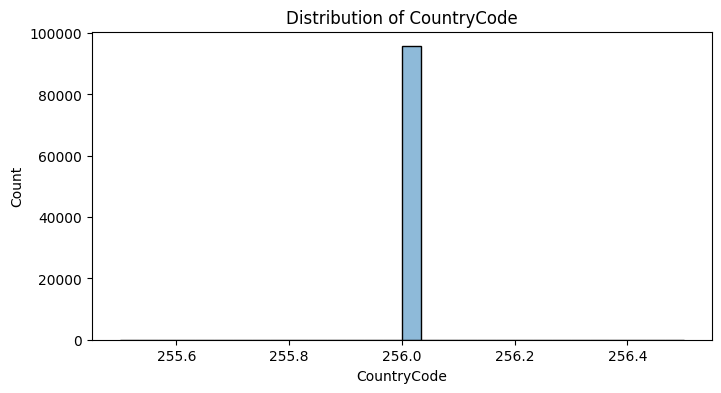

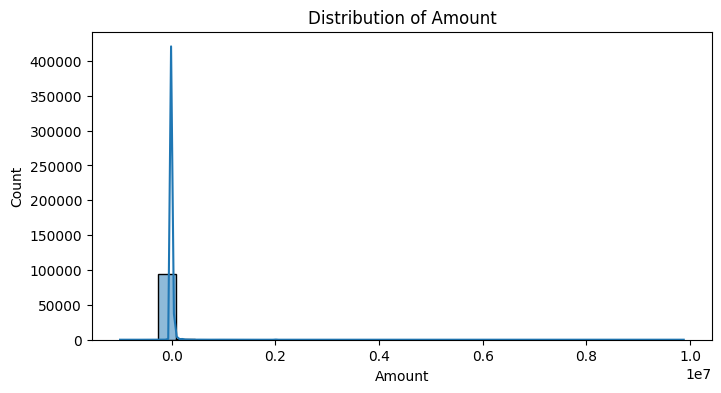

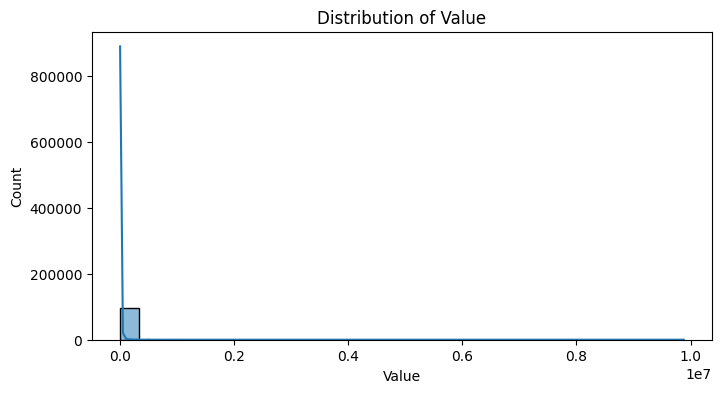

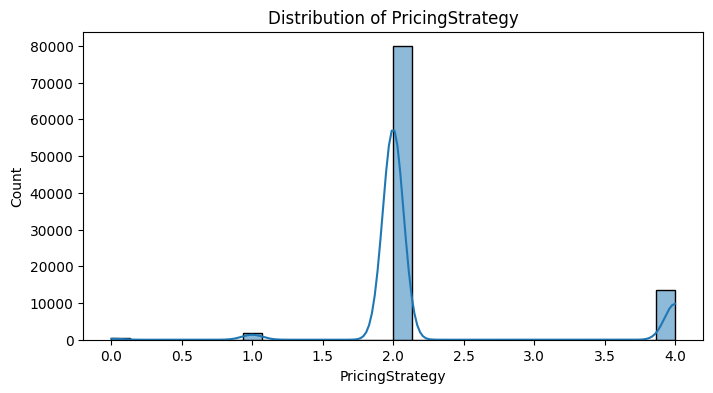

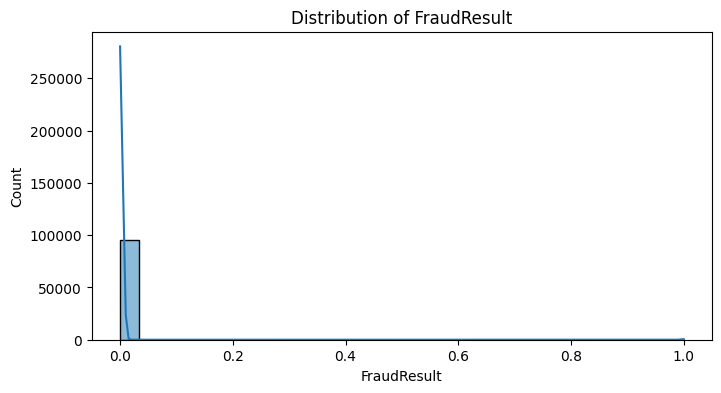

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


Distribution of categorical features

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print((df[col].value_counts(normalize=True, dropna=False) * 100).head())
    print('-' * 40)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')
TransactionId: 95662 unique values
TransactionId
TransactionId_76871    0.001045
TransactionId_73770    0.001045
TransactionId_26203    0.001045
TransactionId_380      0.001045
TransactionId_28195    0.001045
Name: proportion, dtype: float64
----------------------------------------
BatchId: 94809 unique values
BatchId
BatchId_67019     0.029270
BatchId_51870     0.016726
BatchId_113893    0.014635
BatchId_127204    0.012544
BatchId_116835    0.010453
Name: proportion, dtype: float64
----------------------------------------
AccountId: 3633 unique values
AccountId
AccountId_4841    32.293910
AccountId_4249     4.659112
AccountId_4840     1.816813
AccountId_3206     1.155109
AccountId_318      1.118521
Name: proportion, dtype: float64
----------------------------------------
S

## Identifying Missing Values

In [12]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

print(missing)

Series([], dtype: int64)


## Correlation analysis

✅ Correlation Matrix:
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

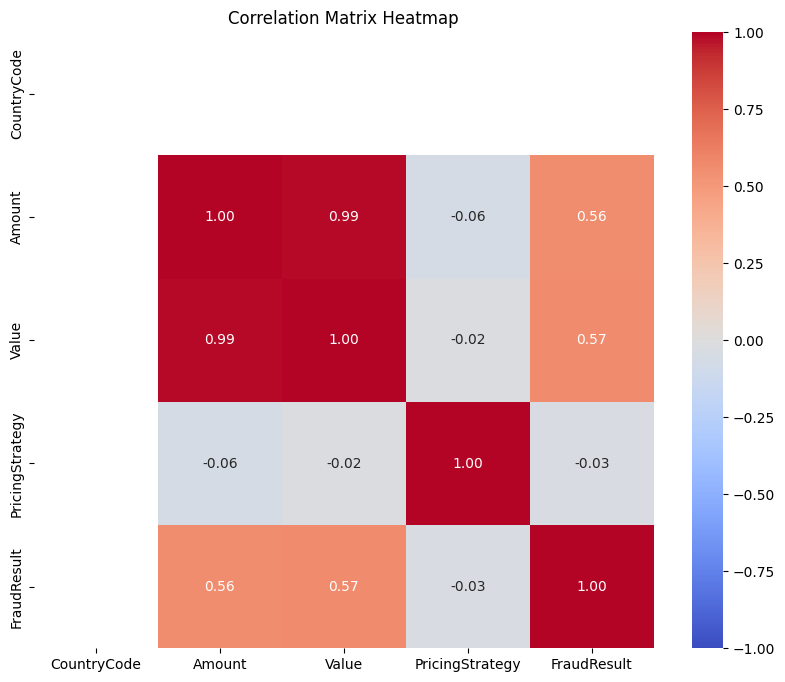

In [6]:
# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

print("✅ Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

## Outlier Detection

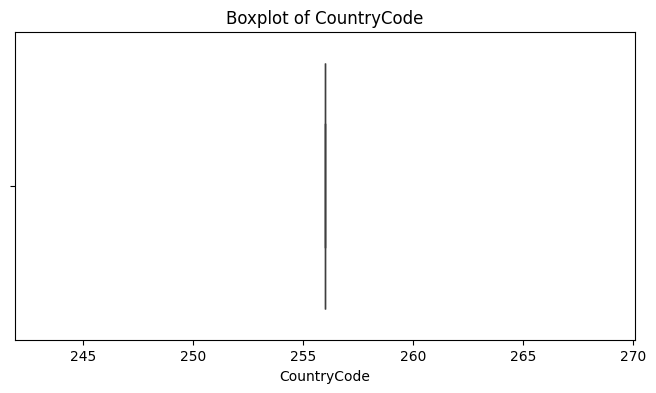

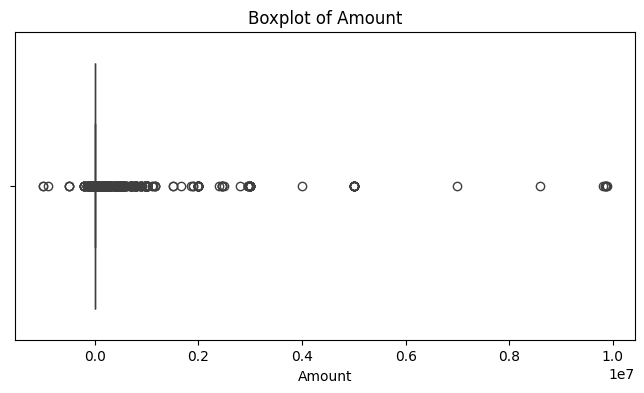

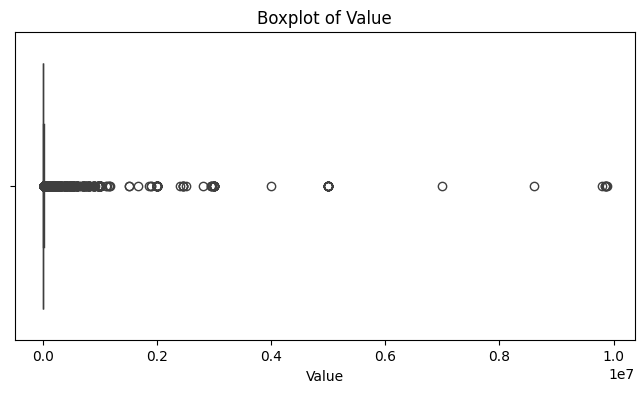

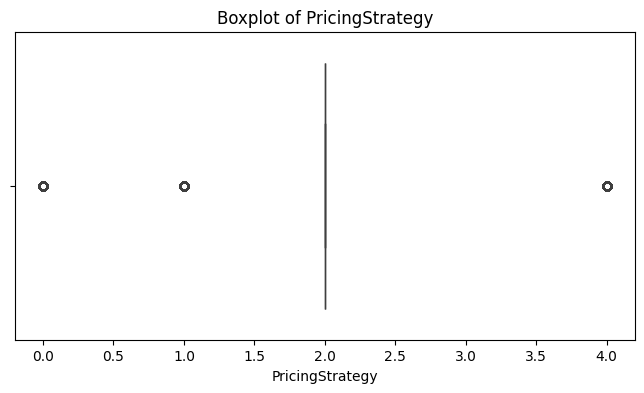

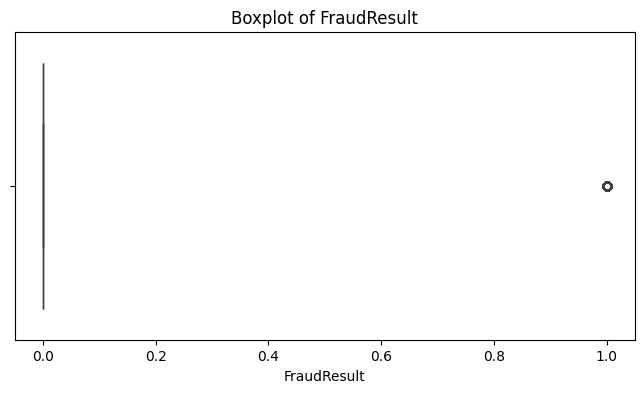

In [13]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### summary


- There are 95662 rows and 16 columns.
- There are 1 float, 11 object and 4 int columns.
- The dataset is from a single countrycode.
- The features Amount, value and fraudresult are skewed to the left.
- the correlations are:
   - CountryCode and Value: Very strong positive correlation (0.99), suggesting near-perfect alignment.
   - Amount and Value: Very strong positive correlation (0.99), indicating they move almost identically.
   - CountryCode/Amount/Value with PricingStrategy: Weak negative correlations (-0.06, -0.02), showing little to no linear relationship.
   - CountryCode/Amount/Value with FraudResult: Moderate positive correlations (0.56, 0.57), suggesting these variables have some association with FraudResult.
  - PricingStrategy with FraudResult: Very weak negative correlation (-0.03), indicating almost no relationship.
  - PricingStrategy with itself, etc.: All variables have a perfect correlation (1.00) with themselves, as expected.
- The box plots suggest limited variability in CountryCode and PricingStrategy, skewed distributions with outliers in Amount and Value, and a highly skewed FraudResult with rare positive cases